<a href="https://colab.research.google.com/github/shubhkamble26/Handwritten-Digit-Recognition-using-Neural-Network/blob/master/Handwritten_Digit_Recognition_using_Neural_Neatwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digit recognition using Neural Network
To create and train a Neural Network model that predict digits from hand-written images 

This model takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit 



Install keras and tensorflow as a backend for keras 

In [ ]:
!install keras
!install tensorflow

install: missing destination file operand after 'keras'
Try 'install --help' for more information.
install: missing destination file operand after 'tensorflow'
Try 'install --help' for more information.


Importing tensorflow as tf

In [ ]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.2.0


# Load Dataset

Load MNIST dataset which has lots of images of hand-written digits along with their labels.

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


Displaying first example in training dataset and it's label

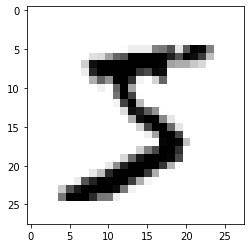

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [ ]:
y_train[0]

5

Total different digits present in dataset

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Apply One Hot Encoding to the y_train and y_test

Convert the number to a vectorial form using One Hot Encoding

* original label :5 
* One-hot encoded label: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

Checking the shape of the encoded labels.

In [ ]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


Each label gets converted into 10 Dimensional vector


Let's look at the first label after encoding:

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Preprocessing the Examples

Create a Neural Network which will take 784 dimensional vectors as inputs (28 rows * 28 columns) and will output a 10 dimensional vector (For the 10 classes). We have already converted the outputs to 10 dimensional, one-hot encoded vectors. Use numpy to easily unroll the examples from `(28, 28)` arrays to `(784, 1)` vectors.

* Unrolling an 28X28 image into 784 dimensional vecor. with 10 classes 0-9 
* (28,28) ----- (784,1)
* By using reshape in numpy


In [ ]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


As this 784 dimensional vector is a pixel value for each example.Check pixels of a first example 

In [ ]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


Pixels are varying from 0 to 255. Now normalise the data as it's range is large.Apply Standard normalisation

In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


Normalise both the training and test set using the mean and standard deviation calculated above.added a small value to our denominator. This is because, just in case if standard Deviation was close to zero,then get very large values as a result. That's obviously not true here but added this anyway as a good practice since this is typically done to ensure numerical stability.

In [ ]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

Let's check first normalised value

In [ ]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Create Model

Use a Sequential class defined in Keras to create our model. All the layers are going to be Dense layers. This means, like our examples above, all the nodes of a layer would be connected to all the nodes of the preceding layer i.e. densely connected.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

Above model have two hidden layers with 128 nodes each and one output layer with 10 nodes. We set the input shape on the first hidden layer to correspond to the shape of a single example from our reshaped training and test sets  each example is a 784 dimensional vector for the 784 pixels of the images.



Use stochastic gradient descent algorithm in order to optimize the weights and biases as per the given data.

This loss needs to be minimised in order to have a higher model accuracy. Optimasation algorithm minimises the loss during model training.Use *categorical cross entropy* as optimisation function.


In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

Train the model for 3 epochs.

In [ ]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 3
)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3599 - accuracy: 0.8951
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1808 - accuracy: 0.9480
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1382 - accuracy: 0.9596


Evaluate the performance on the test set. Simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9599
test set accuracy:  95.99000215530396


# Predictions

In [ ]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


Plotting the first few test set images along with their predicted and actual labels.

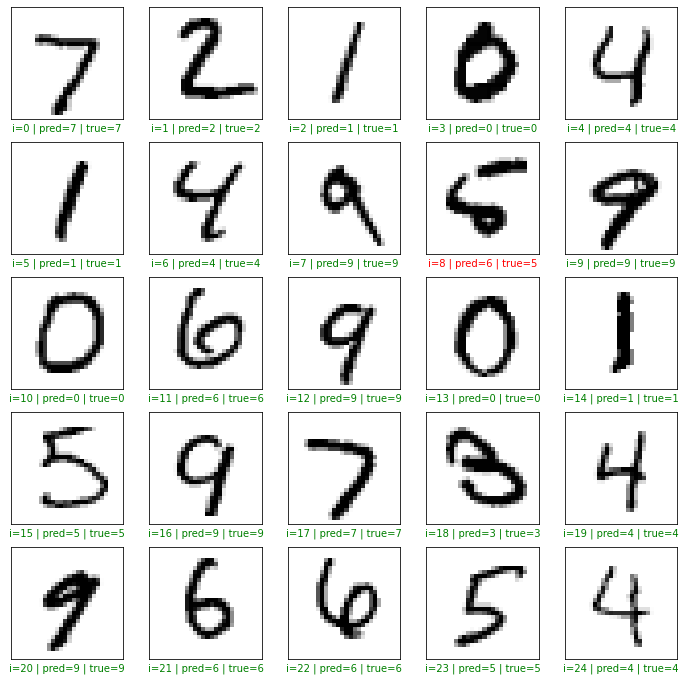

In [ ]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()


It gets most of the predictions right!

Checking the Wrong prediction of index=8

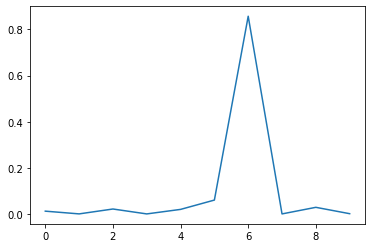

In [ ]:
index = 8

plt.plot(preds[index])
plt.show()